In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# To ignore warnings
import warnings
warnings.simplefilter(action="ignore")

In [2]:
training_data = pd.read_csv("./titanic-train.csv")

test_data = pd.read_csv("./titanic-test.csv")

In [4]:
print("No. of records in training set = {}".format(training_data.shape[0]))
training_data.head()

No. of records in training set = 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("No. of records in test set = {}".format(test_data.shape[0]))
test_data.head()

No. of records in test set = 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Cleaning

In [6]:
print(training_data.isnull().sum())

print("In Training Data")

print("Percentage of null values in column 'Age' = %.2f%%" %(training_data['Age'].isnull().sum()/training_data.shape[0] * 100))

print("Percentage of null values in column 'Cabin' = %.2f%%" %(training_data['Cabin'].isnull().sum()/training_data.shape[0] * 100))

print("Percentage of null values in column 'Embarked' = %.2f%%" %(training_data['Embarked'].isnull().sum()/training_data.shape[0] * 100))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
In Training Data
Percentage of null values in column 'Age' = 19.87%
Percentage of null values in column 'Cabin' = 77.10%
Percentage of null values in column 'Embarked' = 0.22%


More number of missing values for the attribute ***Cabin***.
Therefore it is not advisable to create fake entries and to use the Cabin attribute.

Missing values in the ***Age*** column can be filled up with the median of Age.

Only ***2*** entries are *NULL* in ***Embarked*** column. They can be filled with the category **Southampton** (644 records consists of the value Southampton)

In [7]:
# print(test_data.isnull().sum())

print("In Test Data")

print("Percentage of null values in column 'Age' = %.2f%%" %(test_data['Age'].isnull().sum()/test_data.shape[0] * 100))

print("Percentage of null values in column 'Cabin' = %.2f%%" %(test_data['Cabin'].isnull().sum()/test_data.shape[0] * 100))

In Test Data
Percentage of null values in column 'Age' = 20.57%
Percentage of null values in column 'Cabin' = 78.23%


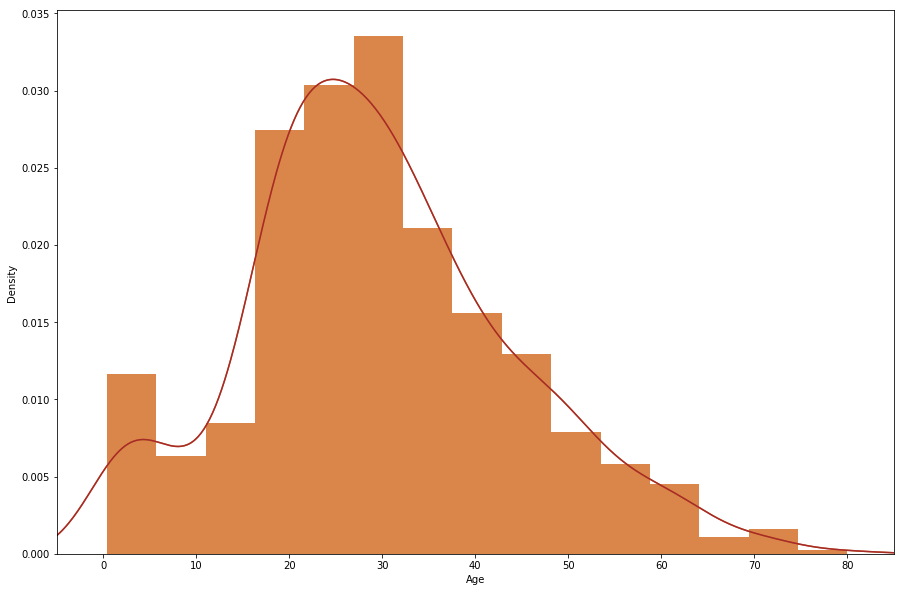

In [8]:
axis = training_data['Age'].hist(bins=15, density=True, stacked=True, color='chocolate', alpha=0.6)
training_data['Age'].plot(kind='density', color='brown')
axis.set(xlabel='Age')
plt.xlim(-5, 85)
plt.show()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

'S' : Southampton
'C' : Cherbourg
'Q' : Queenstown


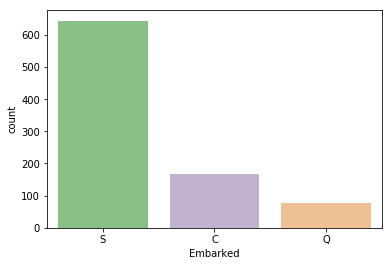

In [14]:
print(training_data['Embarked'].value_counts())
print("\n'S' : Southampton\n'C' : Cherbourg\n'Q' : Queenstown")

sns.countplot(x=training_data['Embarked'], palette="Accent")
plt.show()

In [15]:
c_training_data = training_data.copy()
c_training_data['Age'].fillna(training_data['Age'].median(skipna=True), inplace=True)
c_training_data['Embarked'].fillna(training_data['Embarked'].value_counts().idxmax(), inplace=True)
c_training_data.drop('Cabin', axis=1, inplace=True)

In [16]:
# All NULL values are replaced
c_training_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

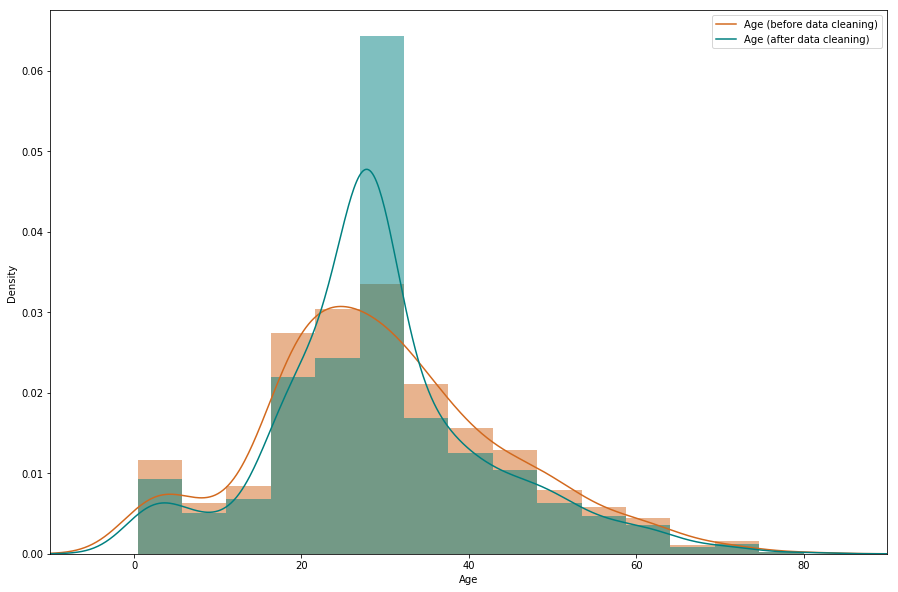

In [17]:
plt.figure(figsize=(15, 10))
axis = training_data['Age'].hist(bins=15, density=True, stacked=True, color='chocolate', alpha=0.5)
training_data['Age'].plot(kind='density', color='chocolate')
axis = c_training_data['Age'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.5)
c_training_data['Age'].plot(kind='density', color='teal')
axis.set(xlabel="Age")
axis.legend(["Age (before data cleaning)", "Age (after data cleaning)"])
plt.xlim(-10, 90)
plt.show()

We don't need ***Name*** and ***Ticket*** column

In [18]:
c_training_data['TravelAlone'] = np.where(c_training_data['SibSp']+c_training_data['Parch'] > 0, 0, 1)
c_training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [19]:
f_training_data = pd.get_dummies(data=c_training_data, columns=['Pclass', 'Embarked', 'Sex'])

# Drop unneccessary columns

f_training_data.drop('PassengerId', axis=1, inplace=True)
f_training_data.drop('Name', axis=1, inplace=True)
f_training_data.drop('SibSp', axis=1, inplace=True)
f_training_data.drop('Parch', axis=1, inplace=True)
f_training_data.drop('Ticket', axis=1, inplace=True)
f_training_data.drop('Sex_female', axis=1, inplace=True)

f_training_data.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


## Explorative Data Analysis

### Exploration of Embarked Port

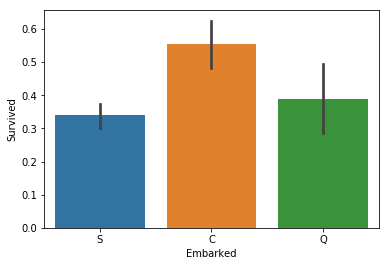

In [20]:
sns.barplot('Embarked', 'Survived', data=c_training_data)
plt.show()

### Exploration of the Gender of the passengers

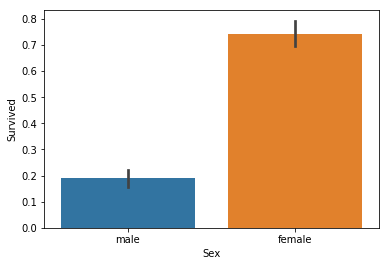

In [21]:
sns.barplot('Sex', 'Survived', data=c_training_data)
plt.show()

### Exploration of Passenger class

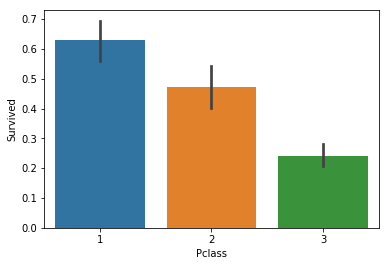

In [23]:
sns.barplot('Pclass', 'Survived', data=c_training_data)
plt.show()

### Exploration of Age of the passengers

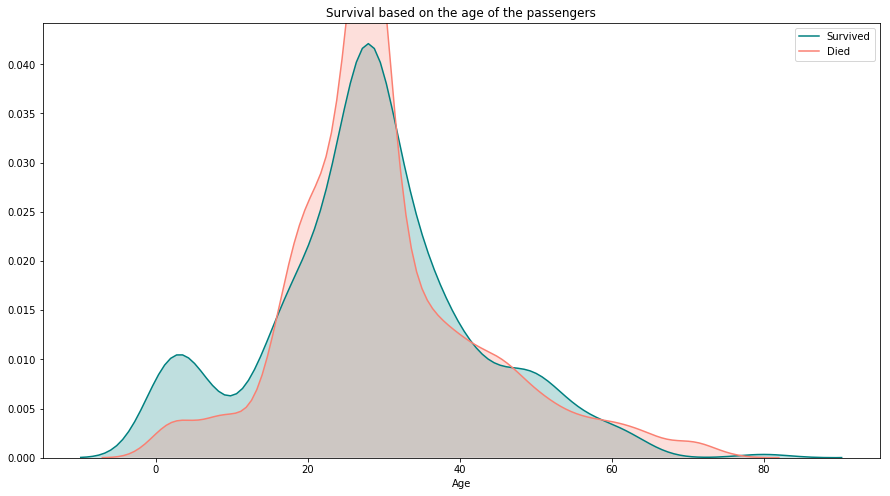

In [24]:
plt.figure(figsize=(15, 8))
axis = sns.kdeplot(c_training_data['Age'][c_training_data.Survived == 1], color='teal', shade=True)
sns.kdeplot(c_training_data['Age'][c_training_data.Survived == 0], color='salmon', shade=True)
plt.legend(['Survived', 'Died'])
plt.title("Survival based on the age of the passengers")
axis.set(xlabel='Age')
plt.show()

### Exploration of Fare of the tickets of passengers

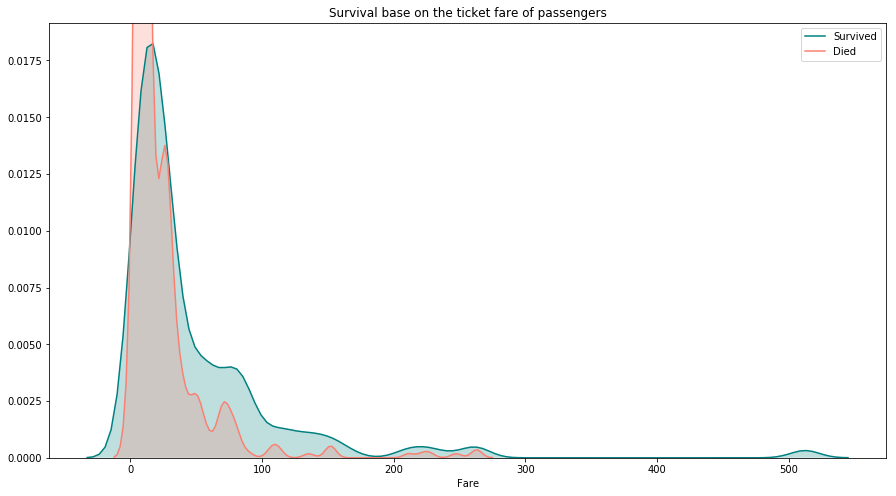

In [25]:
plt.figure(figsize=(15, 8))
axis = sns.kdeplot(c_training_data['Fare'][c_training_data.Survived == 1], color='teal', shade=True)
sns.kdeplot(c_training_data['Fare'][c_training_data.Survived == 0], color='salmon', shade=True)
plt.legend(['Survived', 'Died'])
plt.title("Survival base on the ticket fare of passengers")
axis.set(xlabel="Fare")
plt.show()

### Exploring the travel type of the passengers (Travel Alone or with their family)

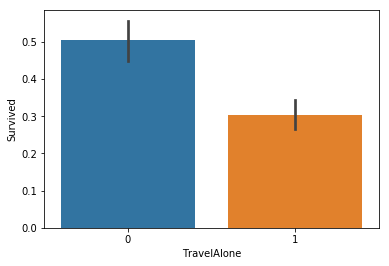

In [26]:
sns.barplot('TravelAlone', 'Survived', data=c_training_data)
plt.show()

### Exploring the correlation between attributes and Survival

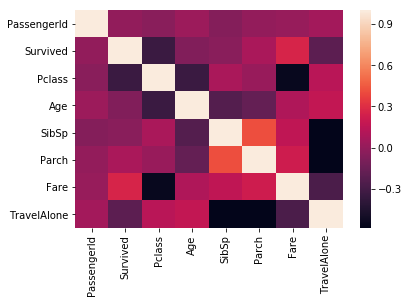

In [28]:
correlation_matrix = c_training_data.corr()
sns.heatmap(correlation_matrix)
plt.show()

Passenger Class is negatively correlated with Survival Rate.
Passenger Class is negatively correlated with Age.
And obviously Pclass is negatively correlated with Ticket Fare.
Ticket Fare and Survival rate are positively correlated.


## Building Logistic regression model